# SSD MobileNet COCO

In [3]:
!pip install opencv-python opencv-python-headless
!wget -q https://github.com/opencv/opencv_extra/raw/master/testdata/dnn/ssd_mobilenet_v1_coco_2017_11_17.pbtxt -O ssd_config.pbtxt
!wget -q http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2017_11_17.tar.gz
!tar -xvzf ssd_mobilenet_v1_coco_2017_11_17.tar.gz

ssd_mobilenet_v1_coco_2017_11_17/
ssd_mobilenet_v1_coco_2017_11_17/model.ckpt.index
ssd_mobilenet_v1_coco_2017_11_17/model.ckpt.meta
ssd_mobilenet_v1_coco_2017_11_17/frozen_inference_graph.pb
ssd_mobilenet_v1_coco_2017_11_17/model.ckpt.data-00000-of-00001
ssd_mobilenet_v1_coco_2017_11_17/saved_model/
ssd_mobilenet_v1_coco_2017_11_17/saved_model/saved_model.pb
ssd_mobilenet_v1_coco_2017_11_17/saved_model/variables/
ssd_mobilenet_v1_coco_2017_11_17/checkpoint


In [4]:
# para detecção de texto
!pip install paddleocr paddlepaddle numpy==1.24.3 --force-reinstall

  Using cached paddleocr-3.0.0-py3-none-any.whl.metadata (14 kB)
  Using cached paddlepaddle-3.0.0-cp311-cp311-manylinux1_x86_64.whl.metadata (8.9 kB)
  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached paddlex-3.0.0-py3-none-any.whl.metadata (73 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached GPUtil-1.4.0-py3-none-any.whl
INFO: pip is looking at multiple versions of paddlex to determine which version is compatible with other requirements. This could take a while.
  Using cached paddleocr-2.10.0-py3-none-any.whl.metadata (12 kB)
  Using cached shapely-2.1.1-cp311-cp311-manylinux_2

In [5]:
import cv2
import time

# Caminhos para os arquivos do modelo
model_weights = 'ssd_mobilenet_v1_coco_2017_11_17/frozen_inference_graph.pb'
model_config = 'ssd_config.pbtxt'

# Carregar modelo
net = cv2.dnn.readNetFromTensorflow(model_weights, model_config)

In [6]:
classes_coco = [
    'background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
    'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
    'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
    'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
    'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
    'hair drier', 'toothbrush'
]

In [7]:
def detectar_com_ssd(imagem_path, threshold=0):
    imagem = cv2.imread(imagem_path)
    h, w = imagem.shape[:2]

    blob = cv2.dnn.blobFromImage(imagem, size=(300, 300), swapRB=True, crop=False)
    net.setInput(blob)

    inicio = time.time()
    output = net.forward()
    fim = time.time()

    for det in output[0, 0, :, :]:
        conf = det[2]
        class_id = int(det[1])
        if conf > threshold:
            x1 = int(det[3] * w)
            y1 = int(det[4] * h)
            x2 = int(det[5] * w)
            y2 = int(det[6] * h)

            nome_classe = classes_coco[class_id] if class_id < len(classes_coco) else "desconhecido"
            label = f'{nome_classe}: {conf:.2f}'

            cv2.rectangle(imagem, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(imagem, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

    print(f"Tempo de execução: {fim - inicio:.3f} segundos")
    return imagem


Tempo de execução: 0.160 segundos


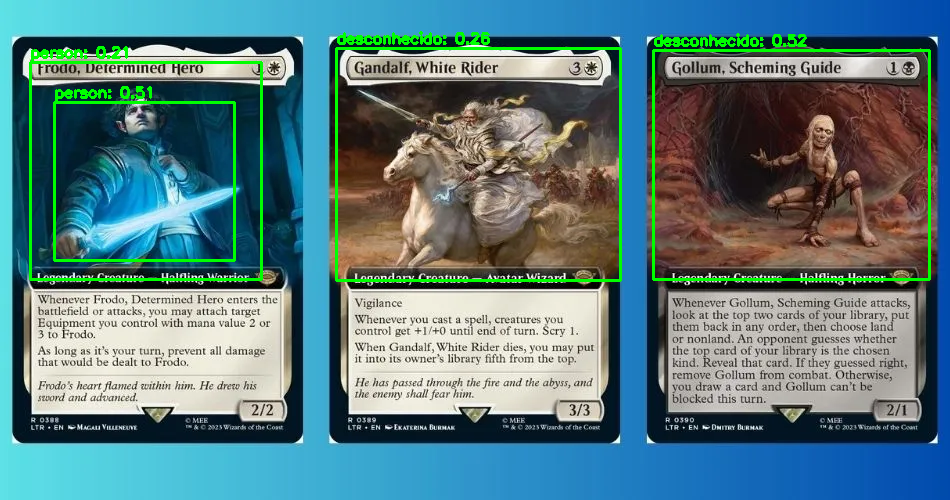

In [8]:
from google.colab.patches import cv2_imshow

imagem_resultado = detectar_com_ssd("cartas_magic.webp", threshold=0.2)
cv2_imshow(imagem_resultado)

# YOLOv5

In [9]:
# Clonar o repositório oficial do YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Instalar as dependências
!pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [10]:
!pip install pillow

In [11]:
from IPython.display import Image  # Para exibir a imagem
import torch

# Verificar se o CUDA está disponível (para GPU)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Usando dispositivo: {device}")

Usando dispositivo: cpu


In [12]:
from PIL import Image
import os

# Caminhos
origem = "/content/cartas_magic.webp"
destino = "/content/cartas_magic.png"

# Verifica se a imagem existe
if os.path.exists(origem):
    img = Image.open(origem).convert("RGB")
    img.save(destino, "PNG")
    print("Imagem convertida e salva com sucesso.")
else:
    print("Imagem .webp não encontrada em /content/")

Imagem convertida e salva com sucesso.


In [13]:
!ls /content

cartas_magic2.png
cartas_magic.png
cartas_magic.webp
sample_data
ssd_config.pbtxt
ssd_mobilenet_v1_coco_2017_11_17
ssd_mobilenet_v1_coco_2017_11_17.tar.gz
ssd_mobilenet_v1_coco_2017_11_17.tar.gz.1
ssd_mobilenet_v1_coco_2017_11_17.tar.gz.2
ssd_mobilenet_v1_coco_2017_11_17.tar.gz.3
ssd_mobilenet_v1_coco_2017_11_17.tar.gz.4
ssd_mobilenet_v1_coco.pbtxt
ssd_mobilenet_v1_coco.pbtxt.1
ssd_mobilenet_v3_large_coco_2020_01_14
ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz
yolov5


In [14]:
!cp /content/cartas_magic.png /content/yolov5/imagem_cartas.png

In [15]:
%cd /content/yolov5
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source imagem_cartas.png

/content/yolov5
detect: weights=['yolov5s.pt'], source=imagem_cartas.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/imagem_cartas.png: 352x640 1 person, 1 sheep, 221.6ms
Speed: 1.7ms pre-process, 221.6ms inference, 2.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp7


In [16]:
!ls runs/detect/exp5

imagem_cartas.png


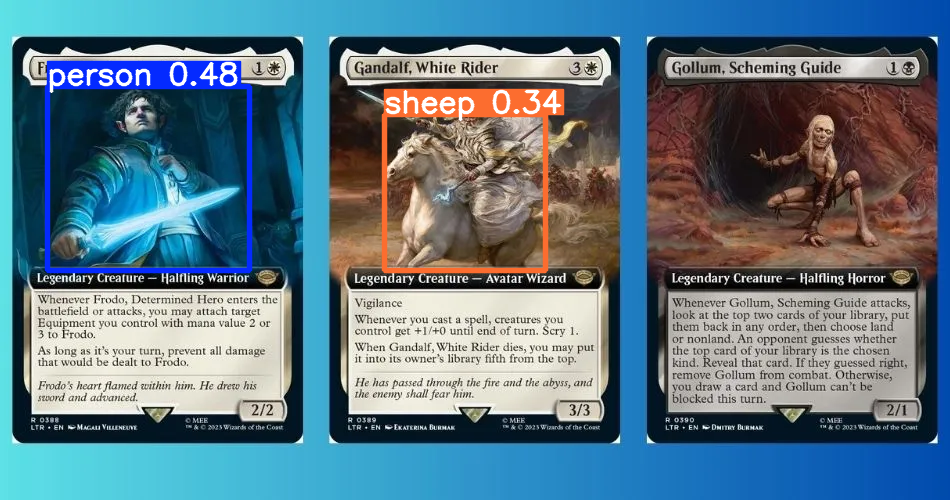

In [17]:
from IPython.display import Image
Image(filename='runs/detect/exp5/imagem_cartas.png')

# Detectando objetos relevantes para a AP2 do grupo

Aqui vamos dar foco em reconhecer cartas e o que está escrito nelas

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [19]:
def detectar_cartas_com_fechamento(imagem_path, area_minima=3000, mostrar=True):
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt

    imagem = cv2.imread(imagem_path)
    if imagem is None:
        raise FileNotFoundError(f"Imagem '{imagem_path}' não encontrada.")
    imagem_original = imagem.copy()

    gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    contraste = clahe.apply(gray)

    blur = cv2.GaussianBlur(contraste, (5, 5), 0)
    bordas = cv2.Canny(blur, 50, 150)

    # NOVO: preencher buracos nas bordas com fechamento morfológico
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    bordas_fechadas = cv2.morphologyEx(bordas, cv2.MORPH_CLOSE, kernel)

    contornos, _ = cv2.findContours(bordas_fechadas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    cartas = []
    for contorno in contornos:
        area = cv2.contourArea(contorno)
        if area < area_minima:
            continue
        x, y, w, h = cv2.boundingRect(contorno)
        proporcao = h / float(w)
        if 1.2 < proporcao < 1.6:  # proporção típica de carta
            crop = imagem_original[y:y+h, x:x+w]
            cartas.append(crop)
            cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 0), 2)

    if mostrar:
        plt.figure(figsize=(12, 6))
        plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
        plt.title(f'{len(cartas)} carta(s) detectada(s)')
        plt.axis('off')
        plt.show()

    return cartas

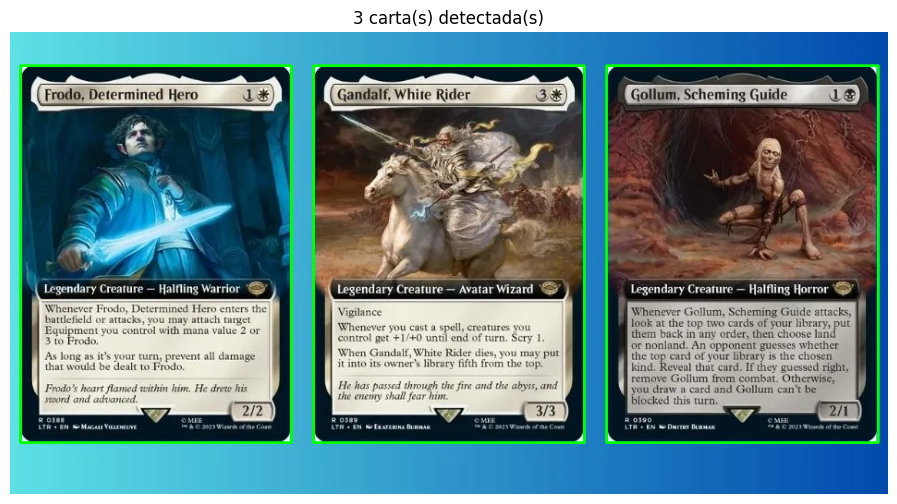

In [20]:
cartas = detectar_cartas_com_fechamento("/content/cartas_magic.png")

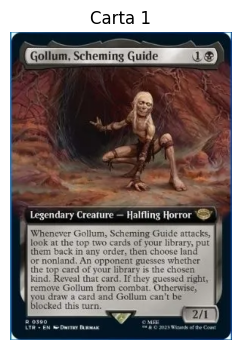

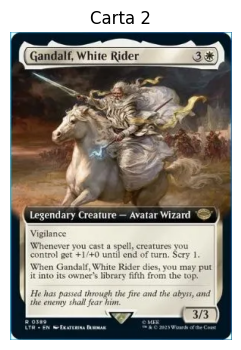

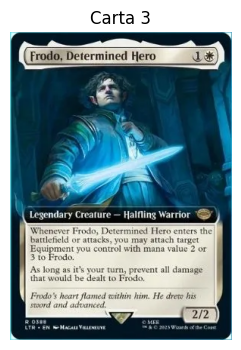

In [21]:
for i, carta in enumerate(cartas):
    plt.figure(figsize=(3, 4))
    plt.imshow(cv2.cvtColor(carta, cv2.COLOR_BGR2RGB))
    plt.title(f"Carta {i+1}")
    plt.axis('off')
    plt.show()

In [22]:
!pip install easyocr

In [23]:
!pip install paddleocr paddlepaddle -q

from paddleocr import PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')  # ou lang='pt' se quiser tentar português


/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:16<00:00, 235.09it/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:18<00:00, 551.08it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:14<00:00, 149.58it/s]

[2025/05/29 01:44:43] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_l

In [29]:
def ocr_com_db(cartas):
    for carta in cartas:
        carta_cv2 = cv2.cvtColor(carta, cv2.COLOR_BGR2RGB)
        result = ocr.ocr(carta_cv2, cls=True)
        textos = []
        for linha in result[0]:
            texto = linha[1][0]
            textos.append(texto)
        final_text = "\n".join(textos)
        print(final_text)
    return final_text


In [30]:
ocr_com_db(cartas)

[2025/05/29 01:50:33] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.07843899726867676
[2025/05/29 01:50:33] ppocr DEBUG: cls num  : 15, elapsed : 0.0654296875
[2025/05/29 01:50:35] ppocr DEBUG: rec_res num  : 15, elapsed : 1.8113689422607422
Gollum, Scheming Guide
Legendary Creature-Halfling Horror
Whenever Gollum, Scheming Guide attacks
look at the top two cards of your library,put
them back in any order,then choose land
or nonland.An opponent guesses whether
the top card of your library is the chosen
kind.Reveal that card.If they guessed right
remove Gollum from combat.Otherwise,
you draw a card and Gollum cant be
blocked this turn.
2/1
EN DMTY BURMA
OMEE
[2025/05/29 01:50:35] ppocr DEBUG: dt_boxes num : 11, elapsed : 0.04901432991027832
[2025/05/29 01:50:35] ppocr DEBUG: cls num  : 11, elapsed : 0.048906803131103516
[2025/05/29 01:50:36] ppocr DEBUG: rec_res num  : 11, elapsed : 1.3237440586090088
Gandalf, White Rider
Legendary Creature-Avatar Wizard
Vigilance
Whenever you cast a spel

"Frodo,Determined Hero\n*\nLegendary Creature-Halfling Warrior\nWhenever Frodo,Determined Hero enters the\nbattlefield or attacks, you may attach target\nEquipment you control with mana value 2 or\n3 to Frodo\nAs long as it's your turn prevent all damage\nthat would be dealt to Frodo\nFrodo's heart flamed within him. He drew his\nsword and advanced.\n2/2\nENMAGA VRLENEE"